[CONFIG] Loaded: {'workarea': {'pose': {'x': 100, 'y': -200, 'z': -20, 'yaw': 0}, 'plane_markers': {'15': {'tag_id': '15', 'local': {'x': 1176.0, 'y': 776.75}, 'global': {'x': 0, 'y': 0}}, '16': {'tag_id': '16', 'local': {'x': 1153.5, 'y': 499.75}, 'global': {'x': 154, 'y': 0}}, '11': {'tag_id': '11', 'local': {'x': 896.25, 'y': 520.25}, 'global': {'x': 154, 'y': 154}}, '10': {'tag_id': '10', 'local': {'x': 917.25, 'y': 787.75}, 'global': {'x': 0, 'y': 154}}}, 'fence': {'xmin': 250, 'xmax': 1200, 'ymin': 50, 'ymax': 1030}}, 'place_pose': {'x': 330, 'y': 90, 'z': 68}, 'buttons': [{'name': 'Plate 1', 'x': 50, 'y': 10, 'width': 150, 'height': 40, 'color': [100, 200, 100]}, {'name': 'Plate 3', 'x': 220, 'y': 10, 'width': 150, 'height': 40, 'color': [100, 100, 200]}, {'name': 'Plate 4', 'x': 390, 'y': 10, 'width': 150, 'height': 40, 'color': [200, 100, 100]}, {'name': 'Plate 5', 'x': 560, 'y': 10, 'width': 150, 'height': 40, 'color': [200, 200, 100]}], 'scale_factor': 0.75, 'image_width': 2

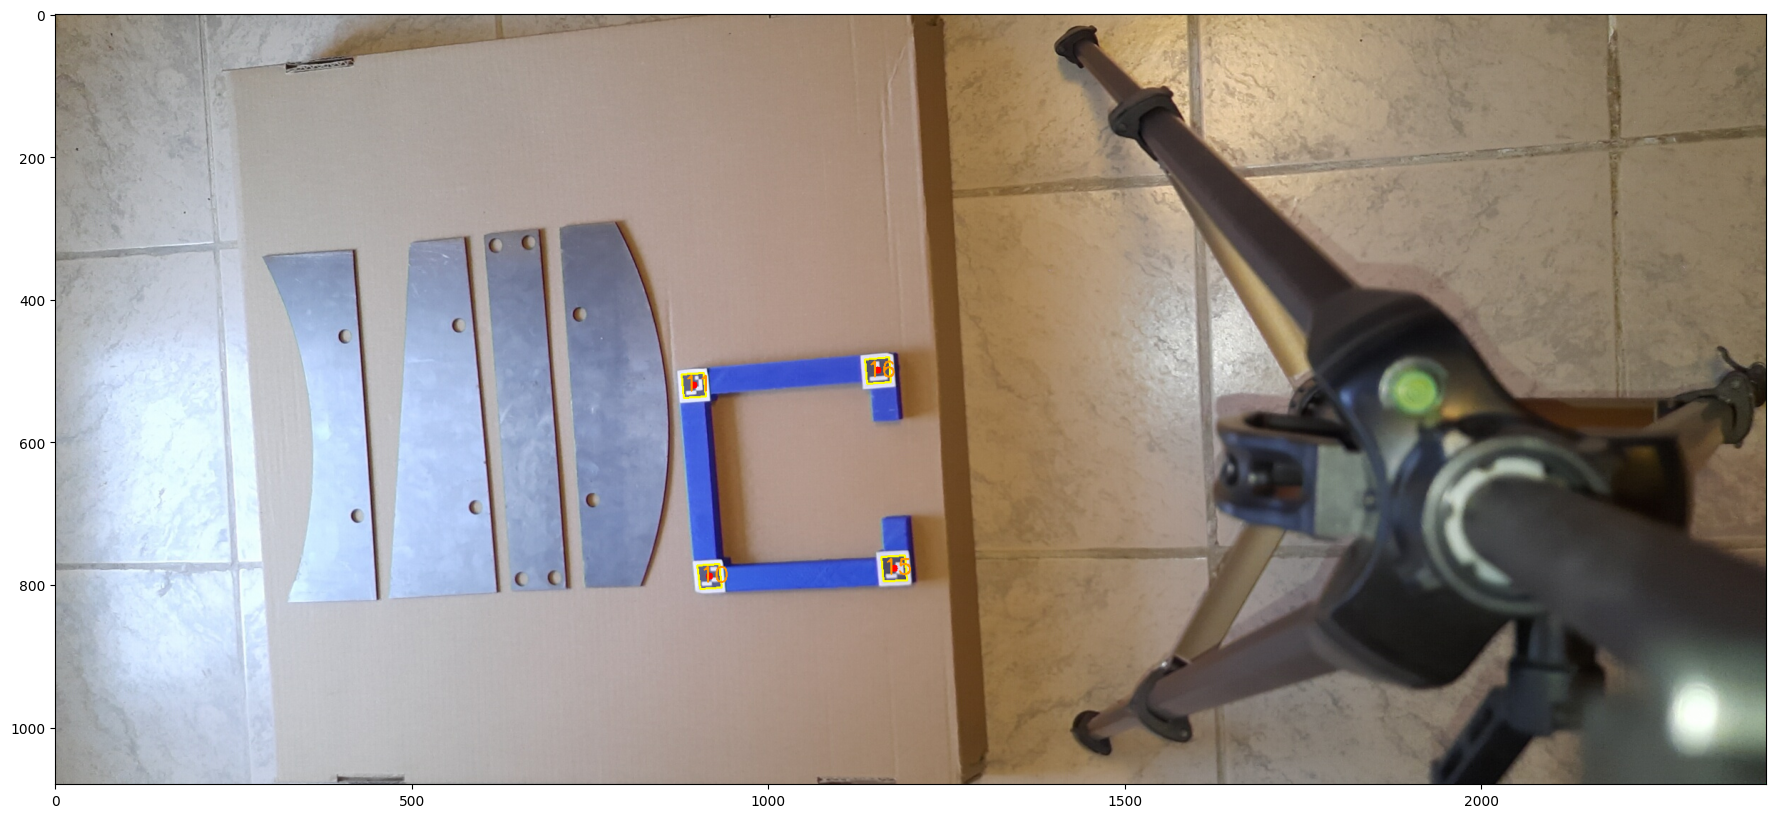

{'15': {'tag_id': '15', 'local': {'x': 1176.0, 'y': 777.25}, 'global': {'x': 0, 'y': 0}}, '16': {'tag_id': '16', 'local': {'x': 1153.25, 'y': 499.75}, 'global': {'x': 154, 'y': 0}}, '11': {'tag_id': '11', 'local': {'x': 895.0, 'y': 520.5}, 'global': {'x': 154, 'y': 154}}, '10': {'tag_id': '10', 'local': {'x': 917.25, 'y': 788.5}, 'global': {'x': 0, 'y': 154}}}


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))
import json_config

from segmentation.detect import ObjectDetector

CONFIG = json_config.load("../config/pick_and_place_gui.json")
IMAGE = "../images/f093cf83020341ceaa75a9fe698b2ff3.jpg"

detect = ObjectDetector()
image = cv2.imread(IMAGE)
markers = CONFIG['workarea']['plane_markers']

plane_markers, all_detected_markers, ids = detect.find_markers(image, markers)

if ids is not None:
    for corner, id_ in zip(all_detected_markers, ids.flatten()):
        pts = corner[0].astype(int)
        cv2.polylines(image, [pts], True, (0, 255, 255), 2)
        center = tuple(np.mean(pts, axis=0).astype(int))
        cv2.circle(image, center, 5, (0, 0, 255), -1)
        cv2.putText(image, f"{id_}", (pts[0][0], pts[0][1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 150, 255), 2)

plt.figure(figsize=(40,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

print(plane_markers)